In [1]:
import pickle
import numpy as np
import pandas as pd
from tqdm import tqdm
import time

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager
%matplotlib inline

In [2]:
data_path = 'mathorcup_recom_listwise/data/'

In [3]:
with open(data_path + 'contentID2idx.pickle', 'rb') as handle:
    contentID2idx = pickle.load(handle)
len(contentID2idx), max(contentID2idx.values())

(2510703, 1484)

# Create One-on-One Content ID to & from Index Mapping

In [8]:
doc_info = pd.read_csv(data_path + 'doc_info.csv', dtype=str)
doc_info

,contentID,contentType,contentCategory
0,124564892986,video,历史/中国史
1,124564906548,video,科学/动植物与微生物
2,124564909185,video,科学/动植物与微生物
3,124564912145,video,科学/动植物与微生物
4,124564932495,video,科学/动植物与微生物
...,...,...,...
2510698,509523681,news,情感/婚姻与家庭
2510699,509523744,news,科技/互联网
2510700,509524347,news,科技/数码产品
2510701,509524365,news,国际/国际趣闻


In [19]:
contentID2idx_1on1 = dict()
contentIdx2ID_1on1 = dict()

In [22]:
# 2510703it [02:03, 20402.56it/s]
for _, row in tqdm(doc_info.iterrows()):
    cID, cT, cC = row
    contentID2idx_1on1[cID] = _
    contentIdx2ID_1on1[_] = cID

2510703it [02:03, 20402.56it/s]


In [25]:
contentIdx2ID_1on1[0], contentID2idx_1on1[contentIdx2ID_1on1[0]]

('124564892986', 0)

In [23]:
len(contentID2idx_1on1), len(contentIdx2ID_1on1)

(2510703, 2510703)

In [26]:
with open(data_path + 'contentID2idx_1on1.pickle', 'wb') as handle:
    pickle.dump(contentID2idx_1on1, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open(data_path + 'contentIdx2ID_1on1.pickle', 'wb') as handle:
    pickle.dump(contentIdx2ID_1on1, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Calculate Content ID Clicked / Duration Matrix

In [7]:
train_df = pd.read_csv(data_path + 'train_data.csv', dtype=str)
train_df

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [36]:
# 31298940it [53:39, 9722.91it/s] 
congtentID_clickedSum_matrix = np.zeros([len(contentID2idx_1on1), 24], dtype=int)
congtentID_durationSum_matrix = np.zeros([len(contentID2idx_1on1), 24])
for index, row in tqdm(train_df.iterrows()):
    t = int(row['time'])
    for icd in row['sequence'].split(';'):
        i, c, d = icd.split(':')
        contentIdx = contentID2idx_1on1[i]
        if eval(c):
            congtentID_clickedSum_matrix[contentIdx, t - 1] += 1
            congtentID_durationSum_matrix[contentIdx, t - 1] += eval(d)

31298940it [53:39, 9722.91it/s] 


In [66]:
with open(data_path + 'congtentID_clickedSum_matrix.npy', 'wb') as f:
    np.save(f, congtentID_clickedSum_matrix)
with open(data_path + 'congtentID_durationSum_matrix.npy', 'wb') as f:
    np.save(f, congtentID_durationSum_matrix)

In [67]:
contentIdx, i

(1176948, '133686197219')

In [39]:
congtentID_durationSum_matrix[40453]

array([ 550., 1479., 1347., 1422., 1150., 3395., 2038., 3174., 2024.,
       3678., 2347., 2943., 3399., 3122., 3247., 2075., 3335., 3852.,
       4955., 5987., 5581., 3962., 2588.,  901.])

In [12]:
with open(data_path + 'contentID2idx_1on1.pickle', 'rb') as handle:
    contentID2idx_1on1 = pickle.load(handle)
congtentID_durationSum_matrix = np.load(data_path + 'congtentID_durationSum_matrix.npy')
congtentID_clickedSum_matrix = np.load(data_path + 'congtentID_clickedSum_matrix.npy')

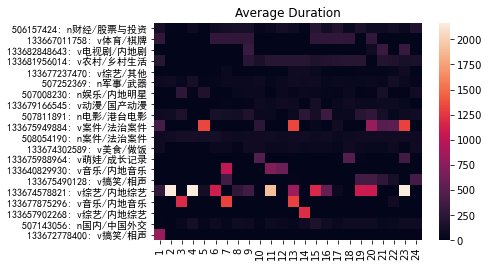

In [39]:
candidates = np.random.choice(range(len(contentID2idx_1on1)), 20)
dense_candidates_IDs = ['506157424', '133667011758', '133682848643', '133681956014', '133677237470',
                       '507252369', '507008230', '133679166545', '507811891', '133675949884',
                       '508054190', '133674302589', '133675988964', '133640829930', '133675490128',
                       '133674578821', '133677875296', '133657902268', '507143056', '133672778400']
#candidates = [contentID2idx_1on1[_] for _ in dense_candidates_IDs]
xticklabels = range(1, 25)
yticklabels = [str(doc_info.loc[_, 'contentID']) + ': ' +
               doc_info.loc[_, 'contentType'][0] + 
               doc_info.loc[_, 'contentCategory'] for _ in candidates]
fontP = font_manager.FontProperties()
fontP.set_family('SimHei')

title = 'Average Duration({})'.format(time.strftime('%Y%m%d-%H%M%S'))
ax = sns.heatmap(congtentID_durationSum_matrix[candidates] / (congtentID_clickedSum_matrix[candidates] + 1e-6), xticklabels=xticklabels)
ax.set_yticklabels(yticklabels, fontproperties=fontP)
ax.set_title(title)
plt.savefig('images/{}.png'.format(title), bbox_inches='tight')

In [133]:
temp = 1229587
congtentID_clickedSum_matrix[temp], congtentID_durationSum_matrix[temp], \
congtentID_durationSum_matrix[temp] / (congtentID_clickedSum_matrix[temp] + 1e-6)

(array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0]),
 array([ 0.,  0.,  0.,  0.,  0., 24.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 0.      ,  0.      ,  0.      ,  0.      ,  0.      , 23.999976,
         0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
         0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
         0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ]))

In [129]:
list(zip(candidates, yticklabels))

[(955762, '506935575: n游戏/主播明星'),
 (2091326, '133671329564: v综艺/内地综艺'),
 (443847, '506442895: n健康/养生与保健'),
 (38593, '133659799734: v电影/欧美电影'),
 (315515, '133666896898: v美食/吃饭'),
 (732310, '508318539: n综艺/内地综艺'),
 (1229587, '508064731: n健康/疾病防护治疗及西医用药'),
 (1095028, '133672993731: v搞笑/其他'),
 (1871557, '133676957178: v颜值才艺/民间大神'),
 (554458, '133663783044: v财经/股票与投资'),
 (1662416, '133683280051: v汽车/汽车资讯'),
 (1120428, '133677368330: v宠物/宠物猫'),
 (1181621, '133686799239: v文化艺术/文玩收藏'),
 (2127918, '133677688375: v搞笑/搞笑自制剧'),
 (1794623, '133658918342: v电视剧/内地剧'),
 (979884, '508161318: n两性/两性健康'),
 (346761, '133674122884: v军事/军事新闻'),
 (1458594, '506949167: n教育/中学'),
 (1302203, '133661904693: v综艺/内地综艺'),
 (722194, '507785994: n汽车/汽车资讯')]

# Calculate Content Score Vector (of size 2510701)

In [101]:
def time_distance(src, tgt, denominator=12):
    """
    :return: range in [0, 12 / denominator]
    """
    a, b = (src, tgt) if src < tgt else (tgt, src)  # a < b
    return min(b-a, a + 24 - b) / denominator

In [140]:
time_distance(20,6), time_distance(23,1), time_distance(23,1), time_distance(eval('0'),0)

(0.8333333333333334, 0.16666666666666666, 0.16666666666666666, 0.0)

In [108]:
congtentID_durationAvg_matrix = congtentID_durationSum_matrix / (congtentID_clickedSum_matrix + 1e-6)
with open(data_path + 'congtentID_durationAvg_matrix.npy', 'wb') as f:
    np.save(f, congtentID_durationAvg_matrix)

In [119]:
# 2510703it [00:41, 60128.49it/s]
contentScore = np.zeros(len(contentID2idx_1on1))
denominator = sum([time_distance(_, 20) for _ in range(1, 25)])  # 12
for index, row in tqdm(enumerate(congtentID_durationAvg_matrix)):
    numerator = 0
    for h, e in enumerate(row):
        numerator += (1 - time_distance(h + 1, 20)) * e
    contentScore[index] = numerator / denominator

2510703it [00:41, 60128.49it/s]


In [139]:
temp = 1229587
congtentID_durationAvg_matrix[temp], contentScore[temp]

(array([ 0.      ,  0.      ,  0.      ,  0.      ,  0.      , 23.999976,
         0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
         0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
         0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ]),
 0.3333330000003332)

(array([2.473312e+06, 3.104800e+04, 5.155000e+03, 9.110000e+02,
        2.190000e+02, 4.200000e+01, 8.000000e+00, 6.000000e+00,
        0.000000e+00, 2.000000e+00]),
 array([   0.        ,  153.67278456,  307.34556912,  461.01835369,
         614.69113825,  768.36392281,  922.03670737, 1075.70949194,
        1229.3822765 , 1383.05506106, 1536.72784562]),
 <BarContainer object of 10 artists>)

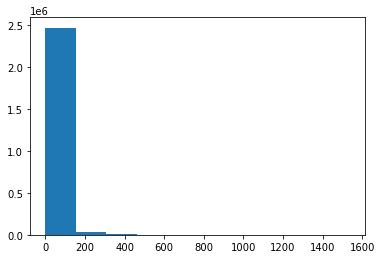

In [122]:
plt.hist(contentScore, bins=10)

In [146]:
with open(data_path + 'contentScore.npy', 'wb') as f:
    np.save(f, contentScore)